In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
Dataset = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Importing Dependencies 

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
# Data engineering and data analysis
Dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#finding the columns and rows

Dataset.shape

(200, 5)

In [6]:
# Getting some inforamtion about dataset 
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# choosing the Annual Income and Spending Score columns
data = Dataset.iloc[:,[3,4]].values

In [8]:
data.shape

(200, 2)

In [9]:
# Choosing the number of clsters
# WCSS --> Within cluster sum of squares
# finding WCSS value for different number of custers
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=34)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)

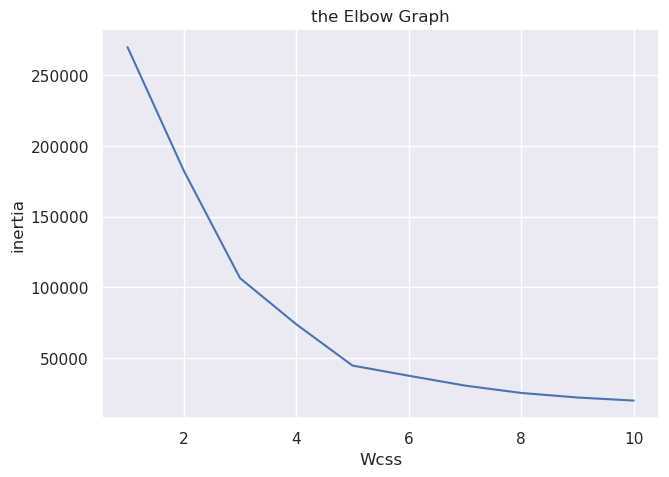

In [10]:
# Creating the elbow Graph
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('the Elbow Graph')
plt.ylabel('inertia')
plt.xlabel('Wcss')
plt.show()

# Optimum number fo custer is 5
**Training the k-means model**

In [11]:
kmeans = KMeans(n_clusters=5,random_state=55)

# Return the labels for each clusters

y = kmeans.fit_predict(data)


In [12]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

#  Visualizing the clusters


Text(0, 0.5, 'Spending Score')

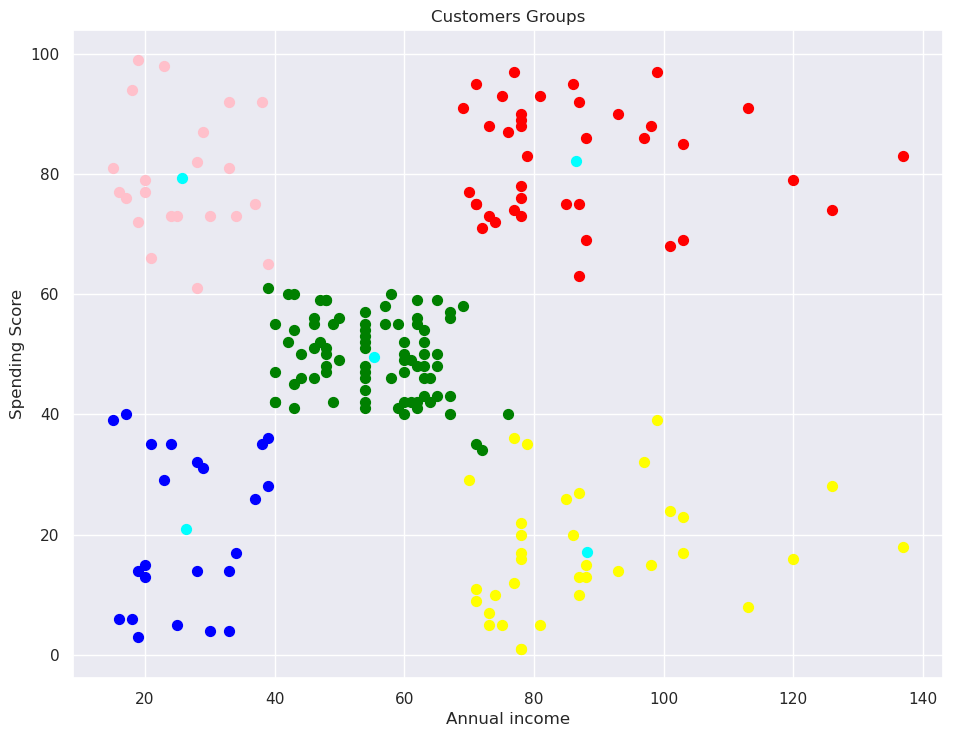

In [13]:
# ploting the clusters the their centroids

plt.figure(figsize=(10,8))
plt.scatter(data[y==0,0],data[y==0,1],s =50,c="green",label = 'custer 1')
plt.scatter(data[y==1,0],data[y==1,1],s =50,c="red",label = 'custer 2')
plt.scatter(data[y==2,0],data[y==2,1],s =50,c="yellow",label = 'custer 3')
plt.scatter(data[y==3,0],data[y==3,1],s =50,c="blue",label = 'custer 4')
plt.scatter(data[y==4,0],data[y==4,1],s =50,c="pink",label = 'custer 5')

# ploting the centroids in these clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 50,c = "cyan",label = 'centriods')
plt.title('Customers Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')

